**Examen Final rescate**

Simulación en PYTHON

Realizado por Miguel Eduardo Zambrano Ussa

Presentado al profersor Hernan Paz Penagos


1) **ANTENAS**

Parametros de readiación de antenas:

In [ ]:
# Se cargan las librerias necesarias
import numpy as  np 
import matplotlib.pyplot as plt
import math
from sympy.abc import a,b,c,d,p,t,y,z                      
from math import log10,sin,cos, sqrt, pi,radians
from sympy import integrate, init_printing
from sympy import simplify
from sympy import cos,pi,sin
init_printing(use_latex="mathjax")

Constantes / Entradas

In [ ]:
# Declaración de constantes - Parametros de antena para dipolo corto de Lambda/15 
Frec=10e6                                # frecuencia 
Cv = 3e8                                 # Cte velocidad de fase de la onda
Io=1                                     # corriente maxima
r=1
W=2*pi*Frec                              # Frecuencia angular
n=120*np.pi                              # impedancia en el espacio libre
lambda1 = Cv/Frec                        # Longitud de onda
B=(2*pi)/lambda1                         # constante de fase
l=lambda1/15                             # Longitud de la antena para dipolo corto
Miu=(4*pi)*1e-7                          # Cte u
a=1.8e-3                                    # Radio del alambre 
s= 5.8e8                                 # separacion entre los alambres del dipolo
Cte1=((Io*B*l)/(4*pi*r))**2              # Ctes potencia radiada
Cte2=(120*(pi)**2)
print(B)
print(l)
print(Cte1)
print(Miu)
print(n)
print(lambda1)

0.0666666666666667*pi
2.0
0.00111111111111111
4.0e-7*pi
376.99111843077515
30.0


Potencia Radiada

In [ ]:
Y_1= integrate(sin(t)**3,(t,0,pi))
Prad=round(Cte1*Cte2*Y_1,4)
print("La Potencia Radiada es: " + str(Prad)+"Io^2[W]")
print("Corriente max Io=1 [A]")

La Potencia Radiada es: 1.7546Io^2[W]
Corriente max Io=1 [A]


Eficiencia de Radiación 

In [ ]:
Rr=(2*(Prad))/Io                                                  # Parametro Rr  
Rs=sqrt((np.pi*Frec*Miu)/(s))                                        # Parametro Rs
Rp=Rs*(1/(2*pi*a))                                                # Parametro Rpresistencia de perdidas
efrad=round((Rr)/(Rr+Rp),6)
print("La Eficiencia de Radiación es: " +str(efrad) + "%")

La Eficiencia de Radiación es: 0.993469%


Campo Eléctrico normalizado y Potencia normalizada

In [ ]:
x=((30*Io*B*l)/r)
Erad=(x)*sin(t)
Em=x
En=Erad/Em
Pn=(En)**2
print("El campo eléctrico normalizado es: " + str(En))
print("La Potencia normalizada es: " + str(Pn))

El campo eléctrico normalizado es: 1.0*sin(t)
La Potencia normalizada es: 1.0*sin(t)**2


Patrón de Radiación 

Interfaz Grafica.

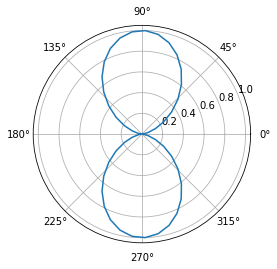

In [ ]:
t= np.linspace(0,2*np.pi)
r= np.sin(t)**2

fig= plt.figure()
ax= fig.add_subplot(111, projection="polar")
ax.plot(t,r)
plt.show()

Ancho de Haz

In [ ]:
from math import sin
A=(integrate(Pn*sin(t),(t,0,pi)))
An_Haz=round(2*pi*A,3)
print("El Ancho de Haz es: " + str(An_Haz) + "[Sr]")

TypeError: ignored

Ah=8.378 sr

Directividad

In [ ]:
An_Haz=8.378
D_= round((4*np.pi*(180/np.pi)**2)/(90*360),1)
D= round((4*pi)/An_Haz,1)
DdB= round(10*log10(D),2)
print("La Directividad Aprox es: " + str(D_))
print("La Directividad en veces es: " + str(D) + "[Veces]")
print("La Directividad en dB es: " + str(DdB) + "[dB]")

La Directividad Aprox es: 1.3
La Directividad en veces es: 1.5[Veces]
La Directividad en dB es: 1.76[dB]


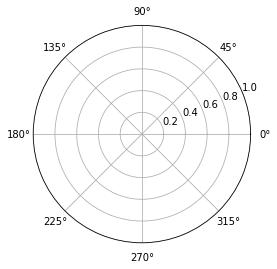

In [ ]:
 t= np.linspace(0,2*np.pi)
 r= D_*(np.cos(t)**2 + np.sin(t)**2)
 fig= plt.figure()
 az= fig.add_subplot(111,projection="polar")
 ax.plot(t,r)
 plt.show()

Impedancia de entrada del Dipolo

In [ ]:
from numpy import log as ln
Rp=0.146
x1=round(((120*lambda1)/(pi*l))*(ln((l)/(2*a))-1))
Rx= Rr+Rp
print("ZA=" + str(Rx) +"-j" + str(x1))



ZA=3.65520104980469-j3048


In [ ]:
FH=Frec+10e3
FL=Frec-10e3
BW=((FH-FL)/(Frec)*100)
print("El Ancho de Banda en % (BW) es: " + str(BW))



El Ancho de Banda en % (BW) es: 0.2


Apertura Efectiva (Parametro de recepción)

In [ ]:
Aef=((D*(lambda1)**2)/4*np.pi)
print("La Apertura Efectiva es: " + str(Aef) + "m^2")

La Apertura Efectiva es: 1060.28752058656m^2


2) **GUIAS DE ONDA**

Tomando como referencia las diapositivas sobre guias de onda del profesor Hernan Paz, usamos los datos para el ejercicio a realizar.

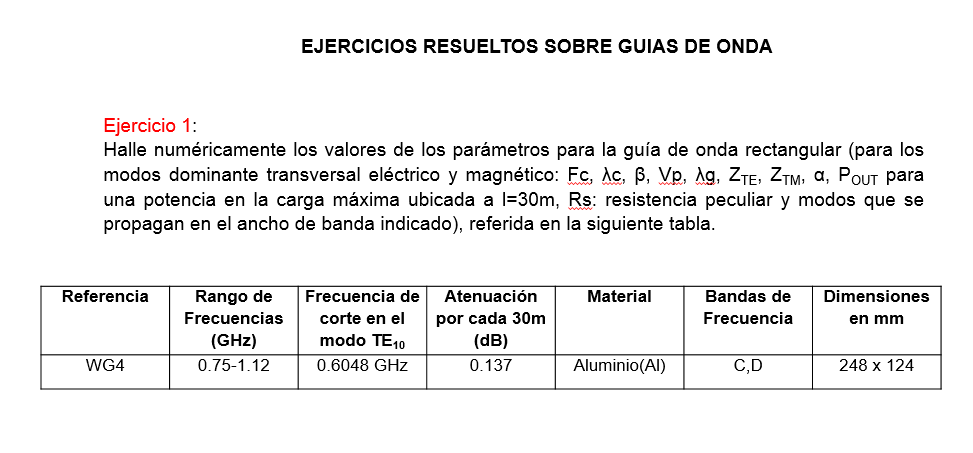

In [ ]:
# Para el modo TE10
# Entradas Dimensiones de la guía
a1=0.248
b1=0.124
fh=1.12e9
fl=0.75e9
nn=2
u=4e-7*(np.pi)
E=8.85e-12
Fop=((fl+fh)/nn)                    # frecuencia de operación
Fco=((Cv)/(2*a1))                   # frecuencia de corte
Lambc=2*a1
W=2*np.pi*Fop
Bet=((W/Cv)**2-(np.pi/a1)**2)**0.5
Vp=W/Bet
Lambg=(Cv/(math.sqrt((Fop)**2-(Fco)**2)))
nx=(math.sqrt((u)/(E)))
Zte=((nx)/(math.sqrt(1-(Fco)**2/(Fop)**2)))

print(Fop)
print(Fco)
print(Lambc)
print(W)
print(Bet)
print(Vp)
print(Lambg)
print(u)
print(nx)
print(Zte)

935000000.0
604838709.6774193
0.496
5874778262.2129135
14.933420929222265
393398022.4663012
0.4207465480923008
1.2566370614359173e-06
376.8194372611951
494.133404818062


A continuación se concluye que ésta guía de onda no se puede operar en el modo TM dadas las dimesiones de las guía y la frecuencia de operación porque la frecuencia de corte del modo TM es mayor al ancho de banda axceptado por la guía de onda.

In [ ]:
from sympy.functions.elementary.piecewise import as_Basic
# Para el modo TM11
m_=1
n_=1
Fctm=((Cv)/(2*np.pi))*(((m_*np.pi)/a1)**2+((n_*np.pi)/b1)**2)**0.5
print(Fctm)

1352460470.2619693


In [ ]:
# Cte de aluminio 
O=3.78e7 
# Resistencia pelicular                  
Rs_=math.sqrt((2*np.pi*Fop*u)/(2*O))
print("La resistencia pelicular es: " + str(Rs_) +  " omh" )
# Resistencia pelicular para la frecuencia High
Rsh=math.sqrt((np.pi*u)/(2*O))*math.sqrt(fh)
print("La resistencia pelicular para la frecuencia High es: " + str(Rsh) +  " omh" )
Rsl=math.sqrt((np.pi*u)/(2*O))*math.sqrt(fl)
print("La resistencia pelicular para la frecuencia Low es: " + str(Rsl) +  " omh" )

La resistencia pelicular es: 0.009881884507965458 omh
La resistencia pelicular para la frecuencia High es: 0.0076476496127273015 omh
La resistencia pelicular para la frecuencia Low es: 0.00625820236407546 omh


Tomando que la potencia en la carga es:

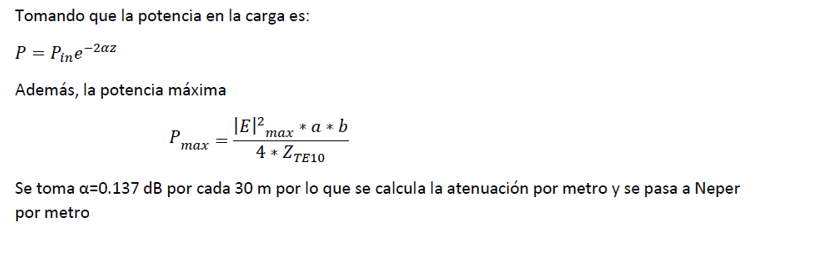


In [ ]:
alf=((0.137)/(30*8.868))
print("La atenuación por metro es: "+ str (alf) + " [Np/m]")

La atenuación por metro es: 0.0005149601563674635 [Np/m]


Frecuaencias de corte TEm,n

Como se verá a continuación, solopasa el modo dominante TE10 por lo que para el anco de banda indicado se realizara el calculo de Beta, Vp, Lambda g, Zte (para el modo Ztm en el modo m=1 y n=1 no se propaga porque no se tendra en cuenta los parámetros que dependen de las transversales magnéticas).   

In [ ]:
Fco01=((Cv)/2)*(math.sqrt(((1)/(b1))**2))
Fco11=((Cv)/2)*(math.sqrt(((1)/(a1))**2+((1)/(b1))**2))
Fco20=((Cv)/2)*(math.sqrt(((2)/(a1))**2))
Fco02=((Cv)/2)*(math.sqrt(((2)/(b1))**2))
Fco21=((Cv)/2)*(math.sqrt(((2)/(a1))**2+((1)/(b1))**2))
Fco12=((Cv)/2)*(math.sqrt(((1)/(a1))**2+((2)/(b1))**2))
Fco22=((Cv)/2)*(math.sqrt(((2)/(a1))**2+((2)/(b1))**2))
print("La frecuencia  de corte del modo TE01 es: " + str (Fco01) + " [Hz]")
print("La frecuencia  de corte del modo TE11 es: " + str (Fco11) + " [Hz]")
print("La frecuencia  de corte del modo TE20 es: " + str (Fco20) + " [Hz]")
print("La frecuencia  de corte del modo TE02 es: " + str (Fco02) + " [Hz]")
print("La frecuencia  de corte del modo TE21 es: " + str (Fco21) + " [Hz]")
print("La frecuencia  de corte del modo TE12 es: " + str (Fco12) + " [Hz]")
print("La frecuencia  de corte del modo TE22 es: " + str (Fco22) + " [Hz]")

La frecuencia  de corte del modo TE01 es: 1209677419.3548386 [Hz]
La frecuencia  de corte del modo TE11 es: 1352460470.2619696 [Hz]
La frecuencia  de corte del modo TE20 es: 1209677419.3548386 [Hz]
La frecuencia  de corte del modo TE02 es: 2419354838.709677 [Hz]
La frecuencia  de corte del modo TE21 es: 1710742212.5480988 [Hz]
La frecuencia  de corte del modo TE12 es: 2493813886.462294 [Hz]
La frecuencia  de corte del modo TE22 es: 2704920940.523939 [Hz]


3) **Circuitos de Microondas**


Tomando como referencia ejercicios enviados de Circuitos de ondas

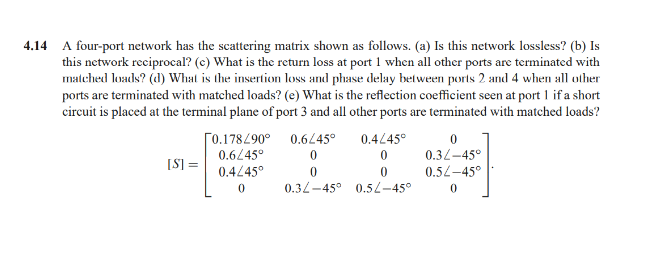

ap.png

In [75]:
# Se toma la magnitud
S11=0.178
S12=0.6
S13=0.4
S14=0
S= S11**2+S12**2+S13**2+S14**2
print("La magnitud de [S] e: " + str (S) + " =\ 1")

La magnitud de [S] e: 0.5516840000000001 =\ 1


pp.png

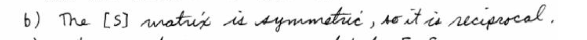

c.png

In [78]:
Rl=round(-20*log10(S11))
print("Rl es: " + str (Rl)+ " dB")

Rl es: 15 dB


d.png

V1+=0 ; V3+=0 ; V4-=S42*V2+

In [82]:
S42=0.3
Il= -20*log10(S42)
print("Il es: " + str (Il)+ " dB")
print("La fase de retardo es: +45°" )

Il es: 10.457574905606752 dB
La fase de retardo es: +45°


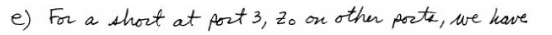

V2+=V4+=0

V3+=-V3-

V1-=S11*V1+S13*V3+=S11*V1+-S13V3-

V3=S31*V1+

In [88]:
S31=0.4
# T=V1-/V1+
Γ=S11-S13*S31
print("Γ es: " + str(Γ) + " j")
print("Γ es: " + str(Γ) + " <90°")

Γ es: 0.01799999999999996 j
Γ es: 0.01799999999999996 <90°
